# Covid19 Cases Scraper

Por Alejandro Andrade Pacheco

In [1]:
import requests
import re
import bs4
import matplotlib.pyplot as plt

La siguiente función utiliza la librería "requests" con la que hacemos una petición de una URL específica y regresamos el contenido de la URL en formato texto.

In [3]:
def pull_site(URL):
    raw_page = requests.get(URL)
    raw_page.raise_for_status()
    return raw_page.text

"cases_scraper" es una función que toma el archivo que regresa "pull_site" y con la librería BeautifulSoup obtenemos un objeto que representa al documento como un estructura de datos anidada de la forma html. Posteriormente seleccionamos la clase "mw-collapsible" que es donde están almacenados los datos que buscamos. 

In [4]:
def cases_scraper(file):
    '''
    : param file : txt file
    '''
    cases = []
    
    soup = bs4.BeautifulSoup(file, 'html.parser')
    html_cases = soup.select('.mw-collapsible')
    
    for hcase in html_cases:
        cases.append(hcase.getText())
    
    return cases

Utilizamos las funciones previamente creadas para la URL de wikipedia con la información de la Pandemia por coronavirus en México.

In [7]:
mex_file = pull_site('https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_M%C3%A9xico')
mex_data = cases_scraper(mex_file)
mex_data[:15]

['Feb',
 'Feb',
 'Mar',
 'Mar',
 'Abr',
 'Abr',
 'Últimos 15 días',
 'Últimos 15 días',
 '\n28-02-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n3\n(n.a.)\n\n\n',
 '\n29-02-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n4\n(33%)\n-\n\n',
 '\n01-03-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n5\n(25%)\n-\n\n',
 '\n06-03-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n6\n(20%)\n-\n\n',
 '\n07-03-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n7\n(17%)\n-\n\n',
 '\n11-03-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n11\n(57%)\n-\n\n',
 '\n12-03-2020\n\n\u200b\n\u200b\n\u200b\n\u200b\n\u200b\n\n15\n(36%)\n-\n\n']

Como vemos en el resultado de la celda anterior, necesitamos limpiar esta información.
Esto lo haremos con el siguiente código

In [9]:
mex_deads = []
mex_cases = []
mex_cases_dict = {}
for md in mex_data[9:]:
    
    md = md.encode('ascii', 'ignore').decode("utf-8")
    date_search = re.search(r'(\d{2}-\d{2}-\d{4})',md)
    dkey = date_search.groups()[0]
    split_md = md.split()
    cases = split_md[1]
    deads = split_md[3]
    if deads == '-':
        deads = 0
    mex_deads.append(int(deads))
    mex_cases.append(int(cases))
    mex_cases_dict[dkey] = [cases, deads]

print(f'Lista de casos en México: \n{mex_cases} \nLista de fallecimientos en México: \n{mex_deads}')

Lista de casos en México: 
[4, 5, 6, 7, 11, 15, 26, 41, 53, 82, 93, 118, 164, 203, 251, 316, 367, 405, 475, 585, 717, 848, 993, 1094, 1215, 1378, 1510, 1688, 1890, 2143, 2439, 2785, 3181, 3441, 3844, 4219, 4661, 5014, 5399, 5847, 6297] 
Lista de fallecimientos en México: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6, 8, 12, 16, 20, 28, 29, 37, 50, 60, 79, 94, 125, 141, 174, 194, 233, 273, 296, 332, 406, 449, 486]


Con Matplotlib hacemos una gráfica

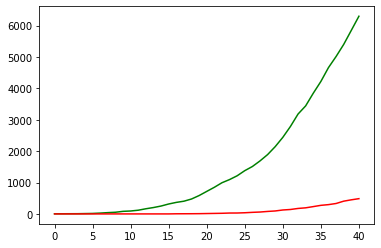

In [12]:
# fig, ax = plt.subplots()

ejex = [x for x in range(len(mex_cases))]
plt.plot(ejex, mex_cases, 'g', ejex, mex_deads, 'r')
plt.show()

La siguiente función "covid_cases_scraper" hace lo mismo que anteriormente pero funciona para las páginas en inglés de wikipedia de casos de coronavirus por pais.

In [13]:
def covid_cases_scraper(URL):
    
    file = pull_site(URL)
    country_cases = cases_scraper(file)
    
    cases_list = []
    deads_list = []
    cases_dict = {}
    
    for cc in country_cases:
        cc = cc.strip()
        cc = cc.encode('ascii', 'ignore').decode("utf-8")
        if not cc.startswith('2020'):
            continue
        date_search = re.search(r'(\d{4}-\d{2}-\d{2})', cc)
        dkey = date_search.groups()[0]
        cc = cc.split()
        no_coma_number = cc[1].replace(",","")
        search_cases = re.search(r'(\d+)', no_coma_number)
        cases = search_cases.groups()[0]
        
        if len(cc) <= 2:
            deads = 0
        else:
            no_coma_deads = cc[2].replace(",", "")
            search_deads = re.search(r'(\d+)',no_coma_deads)
            deads = search_deads.groups()[0]
        
        cases_list.append(int(cases))
        deads_list.append(int(deads))
        cases_dict[dkey] = [cases, deads]
        
    return cases_dict, cases_list, deads_list

Lista de URLs por paises

In [18]:
uk_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_Kingdom"
usa_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_States"
italy_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Italy"
kor_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_South_Korea"
spain_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Spain"
sing_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Singapore"
jap_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Japan"
ger_URL = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Germany"

Ejecutamos la función con las URLs anteriores

In [19]:
uk_dict, uk_cases, uk_deads = covid_cases_scraper(uk_URL)
usa_dict, usa_cases, usa_deads = covid_cases_scraper(usa_URL)
italy_dict, italy_cases, italy_deads = covid_cases_scraper(italy_URL)
kor_dict, kor_cases, kor_deads = covid_cases_scraper(kor_URL)
spain_dict, spain_cases, spain_deads = covid_cases_scraper(spain_URL)
sing_dict, sing_cases, sing_deads = covid_cases_scraper(sing_URL)
jap_dict, jap_cases, jap_deads = covid_cases_scraper(jap_URL)
ger_dict, ger_cases, ger_deads = covid_cases_scraper(ger_URL)


La siguiente función crea el ejex para graficar posteriormente

In [20]:
def ejex(casesList):
    return [x for x in range(len(casesList))]

La función "since" recorta la lista de casos desde un número específico de casos y regresa esta nueva lista y un indice para poder obtener una lista de defunciones desde el mismo número de casos.

In [21]:
def since(casesList, num):
    cases_since_x = [cl for cl in casesList if cl >= num]
    index = len(casesList) - len(cases_since_x)
    return cases_since_x, index

En la siguiente celda obtengo una lista de casos de cada país desde que tuvieron 1000 casos.

In [23]:
desde = 1000
uk_cases_sinceX, uk_index = since(uk_cases, desde)
usa_cases_sinceX, usa_index = since(usa_cases, desde)
italy_cases_sinceX, italy_index = since(italy_cases, desde)
kor_cases_sinceX, kor_index = since(kor_cases, desde)
spain_cases_sinceX, spain_index = since(spain_cases, desde)
sing_cases_sinceX, sing_index = since(sing_cases, desde)
jap_cases_sinceX, jap_index = since(jap_cases, desde)
ger_cases_sinceX, ger_index = since(ger_cases, desde)
mex_cases_sinceX, mex_index = since(mex_cases, desde)

Graficamos para hacer una comparación con todos

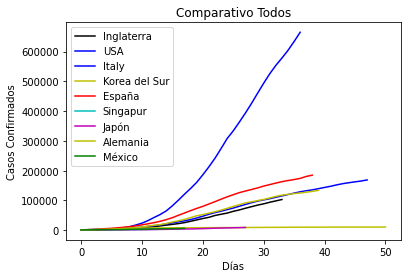

In [24]:
plt.plot(ejex(uk_cases_sinceX), uk_cases_sinceX, 'k', label='Inglaterra')
plt.plot(ejex(usa_cases_sinceX), usa_cases_sinceX, 'b', label='USA')
plt.plot(ejex(italy_cases_sinceX), italy_cases_sinceX, 'b', label='Italy')
plt.plot(ejex(kor_cases_sinceX), kor_cases_sinceX, 'y', label='Korea del Sur')
plt.plot(ejex(spain_cases_sinceX), spain_cases_sinceX, 'r', label='España')
plt.plot(ejex(sing_cases_sinceX), sing_cases_sinceX, 'c', label='Singapur')
plt.plot(ejex(jap_cases_sinceX), jap_cases_sinceX, 'm', label='Japón')
plt.plot(ejex(ger_cases_sinceX), ger_cases_sinceX, 'y', label='Alemania')
plt.plot(ejex(mex_cases_sinceX), mex_cases_sinceX, 'g', label='México')

plt.legend()
plt.title('Comparativo Todos')
plt.ylabel('Casos Confirmados')
plt.xlabel('Días')
plt.show()

Hacemos un comparativo solamente con Inglaterra, Italia, España y Alemania

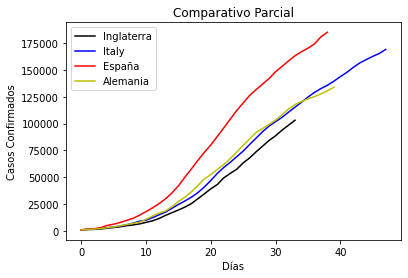

In [29]:
plt.plot(ejex(uk_cases_sinceX), uk_cases_sinceX, 'k', label='Inglaterra')
plt.plot(ejex(italy_cases_sinceX), italy_cases_sinceX, 'b', label='Italy')
plt.plot(ejex(spain_cases_sinceX), spain_cases_sinceX, 'r', label='España')
plt.plot(ejex(ger_cases_sinceX), ger_cases_sinceX, 'y', label='Alemania')
plt.legend()
plt.title('Comparativo Parcial')
plt.ylabel('Casos Confirmados')
plt.xlabel('Días')
plt.show()

Hacemos una gráfica comparando únicamente Korea del Sur, Singapur, Japón y México

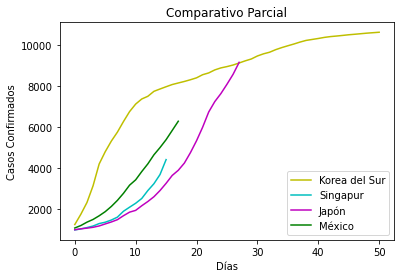

In [27]:
plt.plot(ejex(kor_cases_sinceX), kor_cases_sinceX, 'y', label='Korea del Sur')
plt.plot(ejex(sing_cases_sinceX), sing_cases_sinceX, 'c', label='Singapur')
plt.plot(ejex(jap_cases_sinceX), jap_cases_sinceX, 'm', label='Japón')
plt.plot(ejex(mex_cases_sinceX), mex_cases_sinceX, 'g', label='México')
plt.legend()
plt.title('Comparativo Parcial')
plt.ylabel('Casos Confirmados')
plt.xlabel('Días')
plt.show()